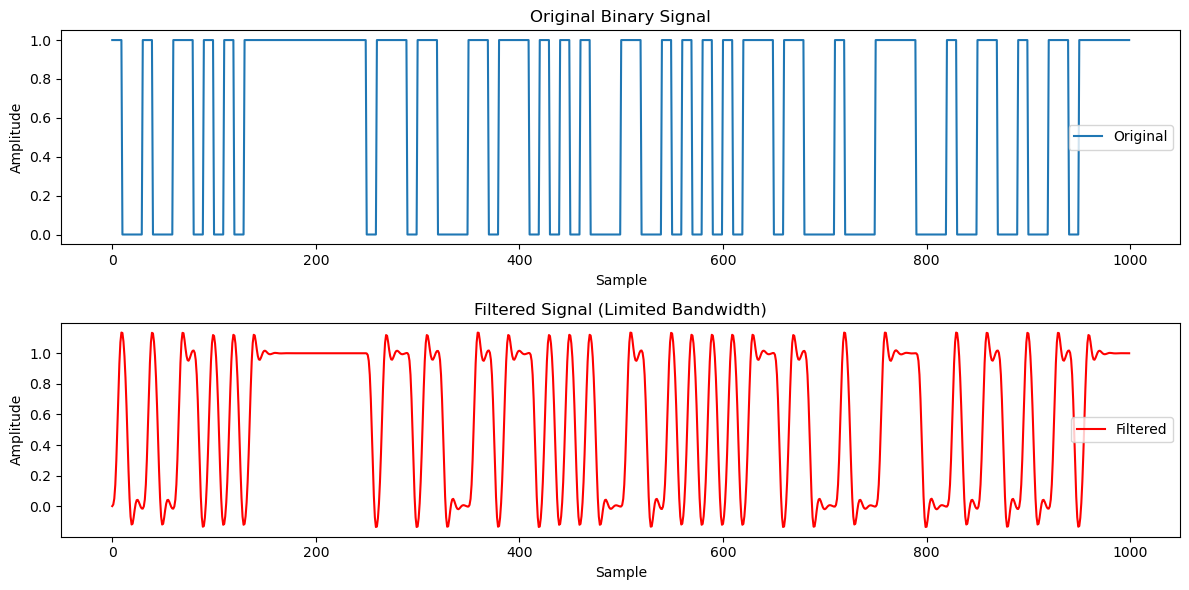

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

def generate_binary_signal(length, bit_duration):
    signal = np.repeat(np.random.randint(0, 2, length), bit_duration)
    return signal

def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Parameters
signal_length = 100  # Number of bits
bit_duration = 10    # Duration of each bit in samples
cutoff_frequency = 1.0  # Cutoff frequency of the low-pass filter (in Hz)
sampling_rate = 10.0  # Sampling rate in Hz

# Generate binary signal
binary_signal = generate_binary_signal(signal_length, bit_duration)

# Apply low-pass filter
filtered_signal = lowpass_filter(binary_signal, cutoff_frequency, sampling_rate)

# Plot the signals
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title("Original Binary Signal")
plt.plot(binary_signal, label="Original")
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()

plt.subplot(2, 1, 2)
plt.title("Filtered Signal (Limited Bandwidth)")
plt.plot(filtered_signal, label="Filtered", color='r')
plt.xlabel("Sample")
plt.ylabel("Amplitude")
plt.legend()

plt.tight_layout()
plt.show()
